# Aula 7 - Exercícios - Webscrapy
### Consulta a internet (Google, Stackoverflow e etc) liberada!!

### 7.1 Usando uma IDE de desenvolvimento python (como o Pycharm) desenvolva um script de webscrapy para coletar os dados dos processos da sua caixa de entrada de processos do SEI.
#### Depois de testar seu script numa IDE, cole-o na célula deste exercício logo abaixo.
#### O seu script deve fazer login automaticamente no SEI.
#### Colete os dados da visualização detalhada da sua caixa de entrada.
#### Colete o número e a URL do processo, a pessoa para quem foi atribuido, o tipo, e os interessados.
#### Veja a seguir um exemplo da tela do SEI a ser analisada.
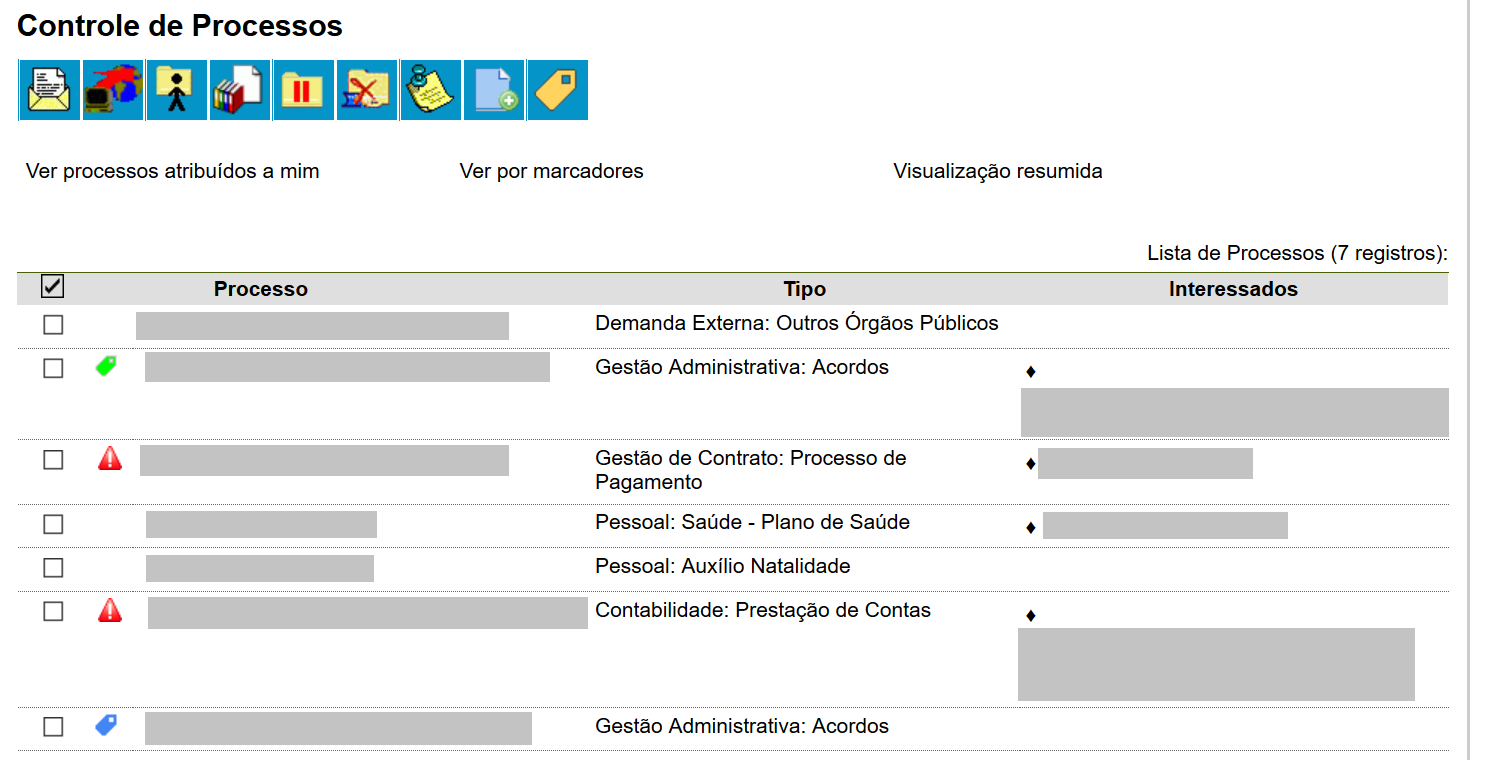

In [1]:
# YOUR CODE HERE
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

ModuleNotFoundError: No module named 'selenium'

In [ ]:
def wait_element(driver, expected_element, by):
    try:
        element = WebDriverWait(driver, 15).until(
            EC.presence_of_element_located((by, expected_element))
        )
        return True
    finally:
        return False

In [ ]:
################################################################
#              Scrape scrape_questoes_concurso                 #
#                                                              #
# Returns: list of questions, wich is a dict                   #
################################################################
def scrape_questoes_concurso():
    # This function will return a list of questions
    questions = [] # will be return

    # Creating a browser (driver) to access the pages
    browser = webdriver.Firefox(executable_path="./driver/geckodriver")

    # Opening the page
    browser.get('https://www.qconcursos.com/questoes-de-concursos/questoes')

    # Waiting fot the//div[@class="q-question-body"] element to be loaded
    wait_element(browser, '//div[@class="q-question-body"]', by=By.XPATH)

    # Getting a list of elements that encapsulate each question
    questions_elements = browser.find_elements_by_class_name("q-question-body")

    # Iterating through the questions list
    for question_element in questions_elements:

        print("#############################  QUESTION #######################################")

        # Question: is the dict that will be filled with the questions and an list of answer options
        question = {
            "enunciado": None,
            "opcoes": []
        }

        # Getting question enunciate
        enunciate_element = question_element.find_element_by_class_name("q-question-enunciation")
        print(enunciate_element.text)

        # Storing the question enunciation in the dict
        question["enunciado"] = enunciate_element.text

        # Getting question answer options
        options_elements = question_element.find_elements_by_xpath("./ul[@class='q-question-options ']/li")

        # Iterating through the option elements
        for option_element in options_elements:
            option_index = option_element.find_element_by_xpath(".//span").text
            option_text  = option_element.find_element_by_xpath(".//div").text

            # Storing the option in the dic
            option = {option_index: option_text}
            question["opcoes"].append(option)

        # Adding the question dict to the final list os questions (will be returned by this function)
        questions.append(question)

    # Closing the browser
    browser.close()

    # Returning the collected questions
    return questions

In [ ]:
# Main method
if __name__ == '__main__':
    print(scrape_questoes_concurso())

Resultado: [{'enunciado': 'O tratamento psicofarmacológico vem se tornando cada vez mais componente do atendimento psiquiátrico. O enfermeiro que atua em enfermagem psiquiátrica desempenha um importante trabalho no cuidado das pessoas que necessitam desse tipo de tratamento. Sobre os cuidados de enfermagem psicofarmacológico, é correto afirmar que', 'opcoes': [{'A': 'a poliúria é um dos efeitos colaterais mais comuns entre os efeitos adversos dos antidepressivos.'}, {'B': 'a tolerância ao uso de antipsicótico se desenvolve quanto aos efeitos sedativos e de falta de motora.'}, {'C': 'os benzodiazepínicos ou neurolépticos são medicamentos tricíclicos indicados como adjuvantes no tratamento de transtornos do humor.'}, {'D': 'todo tratamento psicofarmacológico envolve as seguintes etapas: início, estabilização, manutenção e retirada (quando possível).'}]}, {'enunciado': 'O enfermeiro especialista em saúde mental e psiquiátrica, no plano de cuidados que desenvolve, analisa a avaliação preliminar e determina os diagnósticos de enfermagem. Sobre o diagnóstico de enfermagem em saúde mental, é correto afirmar que', 'opcoes': [{'A': 'identifica os resultados esperados segundo a classificação dos resultados de enfermagem NOC.'}, {'B': 'desenvolve o planejamento das intervenções e as prescreve de forma sistematizada.'}, {'C': 'seleciona a provisão das intervenções de enfermagem, a partir da identificação das necessidades de cada pessoa diante do transtorno mental existente, sendo priorizado segundo a North American Nursing Diagnosis Association (NANDA).'}, {'D': 'implementa as intervenções de enfermagem prescritas para atingir os resultados esperados.'}]}, {'enunciado': 'O campo da atenção psicossocial passa por reflexões sobre a atuação do enfermeiro no setor da psiquiatria. Sobre o cuidado de enfermagem em saúde mental, é correto afirmar que', 'opcoes': [{'A': 'consiste no registro fixo de novos fatos relacionados às demandas da atenção primária em saúde.'}, {'B': 'desenvolve atividades específicas que envolvem diagnóstico psicopatológico, tratamento, prevenção e reabilitação dos mais variados distúrbios mentais, sejam eles de origem orgânica ou funcional.'}, {'C': 'desenvolve procedimentos cognitivos e motores, considerando sempre a dinâmica motora e perceptiva do paciente em situação de crise.'}, {'D': 'consiste na promoção de saúde mental, prevenção de doenças, apoio ao enfrentamento de pressões, sofrimentos e dificuldades, voltado para a inclusão do paciente junto à família e à comunidade.'}]}, {'enunciado': 'No contexto do processo de participação social na reforma psiquiátrica, é correto afirmar que', 'opcoes': [{'A': 'diz respeito à constituição do Movimento dos Trabalhadores em Saúde Mental (MTSM), primeiro sujeito coletivo com o propósito de reformulação da assistência psiquiátrica.'}, {'B': 'os primeiros movimentos relacionados à assistência psiquiátrica brasileira surgiram nos anos 1980.'}, {'C': 'a I Conferência Nacional de Saúde Mental ocorreu em Brasília no ano de 1987.'}, {'D': 'foi instituída, em 2000, a RAPS (Portaria GM/ MS nº 3.088 de 23/12/2011), que possibilita uma nova dimensão social em saúde mental.'}]}, {'enunciado': 'A política de saúde Humaniza SUS, com o objetivo de trazer melhoria ao atendimento prestado pelos serviços de saúde, apresenta definição clara a respeito da assistência integral ao usuário, denominada Clínica Ampliada. Sobre esse serviço, é correto afirmar que', 'opcoes': [{'A': 'constitui-se como o eixo mais complexo do trabalho do enfermeiro especialista em saúde mental, do enfermeiro generalista e dos ACS.'}, {'B': 'é porta de entrada para o atendimento de saúde, em todos seus níveis, que desenvolve trabalho próximo das equipes de Saúde da Família em relação aos problemas de saúde mental.'}, {'C': 'propõe que o profissional enfermeiro deva desenvolver sua capacidade de ajudar as pessoas, desviando o foco na medicalização, tendo um olhar interdisciplinar para ver o sujeito em sua integralidade e ainda considere a integralidade biopsicossocial das demandas de saúde.'}, {'D': 'propõe ações de mobilização de recursos comunitários, buscando construir espaços de reabilitação psicossocial na comunidade, como oficinas comunitárias.'}]}]
